In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# add here the libraries you need
from markovchain import MarkovChain
import warnings
from scipy.stats import binom

# Discrete Time Markov Chains
This is an exercise notebook on DTMCs. 

Remember to revise of the lecture on DTMC before attempting to solve it! 

### Models

Consider few DTMCs, those seen in the lectures and few more:

1. A student goes to a concert and alternates between being "dancing" and being "at the bar" until, at a certain point, it goes home which is an absorbing state. Model this scenario as a DTMC, draw the diagram and define the respective transition matrix, called `transition_concert`.  

Give names to states and use a dictionary to match names with indexes in the matrix.


Always check that the defined transition matrix is **well-defined**.

In [20]:
#the function takes in input a transition matrix
#and throws an exception if the matrix is not well defined
def check_well_defined(trans_matrix):
        epsilon = 0.0001
        for i in range(len(trans_matrix)):
            sum_row = 0
            for j in range(len(trans_matrix)):
                sum_row = sum_row + trans_matrix[i][j]
            if(sum_row > (1.0 + epsilon) or sum_row < (1 - epsilon)):
                raise Exception("The transition matrix is not well defined!")

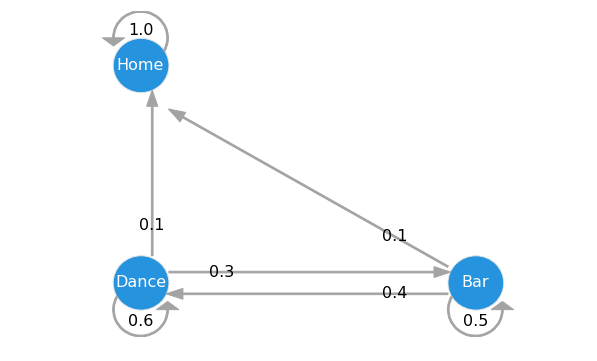

In [21]:
# statespace 
states_dict = {0:"Dance", 1:"Bar", 2:"Home"}

# possible choice of probabilities
DH = 0.1
BH = 0.1
DB = 0.3
BD = 0.4

# transition matrix
transition_concert = np.array([
    [1 - (DH + DB), DB, DH],
    [BD, 1 - (BH + BD), BH],
    [0.0, 0.0, 1.0],
])
                
check_well_defined(transition_concert)

mc = MarkovChain(transition_concert, ['Dance', 'Bar', 'Home'])
mc.draw()

2. Consider a walker moving randomly along the star graph shown below. The graph is composed of six states. State 6 is the terminal point. 

<img src="imgs/star_graph.png" width="300">

Model the movement of the walker as a DTMC. Choose the parameters $a,b,c,d,e,f,e\in (0,1)$ so that the transition matrix, `transition_star`, is well-defined.
Keep in mind that, ingoing and outgoing transitions can happen with different probabilities.

In [22]:
#this is a possible choice of the probabilities
a = 0.8
b = 0.1
c = 0.7
d = 0.6
e = 0.8
f = 0.7

#this is the general transition matrix for the movement of the walker
transition_star = np.array([
    [0.0, 0.0, 0.0, (1-a), a, 0.0],
    [0.0, 0.0, c, 0.0 , (1-b-c), b],
    [0.0, (1-d), 0.0, d, 0.0, 0.0],
    [e, 0.0, (1-e), 0.0, 0.0, 0.0],
    [(1-f), f, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
])

check_well_defined(transition_star)

transition_star


array([[0. , 0. , 0. , 0.2, 0.8, 0. ],
       [0. , 0. , 0.7, 0. , 0.2, 0.1],
       [0. , 0.4, 0. , 0.6, 0. , 0. ],
       [0.8, 0. , 0.2, 0. , 0. , 0. ],
       [0.3, 0.7, 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 1. ]])

3. A general birth-death chain, `transition_birth_death()`. Define it writing a function that takes `N` as input (the maximum population size) and vectors `p` (the birth probability) and `q` (the death probability) of length N and returns the transition matrix `transition_birth_death`.

<img src="imgs/birth-death.png" width="600">

In [23]:
#the function takes in input the maximum population size,
#the birth probability and the death probability
#and returns the transition matrix for a birth-death chain
def get_transition_birth_death(N, p, q):
    transition_birth_death = np.zeros((N, N))
    for i in range (N):
            if(i>0):
                transition_birth_death[i][i-1] = q[i]
            if(i<(N-1)):
                transition_birth_death[i][i+1] = p[i]
                
            if((i>0) & (i<(N-1))):
                transition_birth_death[i][i] = 1 - (p[i]+q[i])
            elif(i == 0):
                transition_birth_death[i][i] = 1 - (p[i])
            else:
                transition_birth_death[i][i] = 1 - (q[i])
                
    return transition_birth_death

In [24]:
N = 4
p = np.array([0.4, 0.4, 0.4, 0.4])
q = np.array([0.2, 0.2, 0.2, 0.2])

transition_birth_death = get_transition_birth_death(N, p, q)
check_well_defined(transition_birth_death)
transition_birth_death

array([[0.6, 0.4, 0. , 0. ],
       [0.2, 0.4, 0.4, 0. ],
       [0. , 0.2, 0.4, 0.4],
       [0. , 0. , 0.2, 0.8]])

4. **Queue model**. Queuing chains model the number of customers in the system as a function of time, and in particular, whether the server(s) can adequately handle the flow of customers. 
Let $X_n$ be the number of custumers in the system at time $n\in \mathbb{N}$. 
Define a DTMC that models a queueing system where the costumer propensity to join the system, i.e. the arrival rate, is inversely proportional to the current length of the queue.


Draw the transitions graph, the transition matrix and explain the details of your model in the two following scenarios:

4.1. **Single server**: the service is provided by a single server with service rate $\mu$


<img src="imgs/xqueue.png" width="300">


4.2. $m$ **servers**: the service is provided by $m$ servers each with a service rate $\mu$

<img src="imgs/xqueue_m_servers.png" width="300">

**Single server**
The state set is given by the number of customers {1, 2, 3, ...} and the transition graph is very similar to the death-birth chain with the difference that the arrival rate depends on the current state by $\lambda_k = c * {1 \over K}$, where c is a constant for all the states and K is one of the states. At each state, there is a probability $\lambda$ that the lenght of the queue increases by one, another probability $\mu$ that it decreases by one and the probability of remaining in the same state $1-(\lambda + \mu)$. 

So, the transition graph is the following, with K one of the states of the state set.

<img src="imgs/1server.png" width="600">

The transition matrix that corresponds to this graph is the following:

$$ \pi = \begin{bmatrix} 1-\lambda_0 & \lambda_0 & 0 & ... & 0 & 0 \\ \mu & 1- ( \mu + \lambda_1) & \lambda_1 & ... & 0 & 0 \\ 0 & \mu & 1- ( \mu + \lambda_2 ) & ... & 0 & 0\\ ... & ... & ... & ... & ... \\ 0 & 0  & 0 & ... & \mu & 1 - \mu \end{bmatrix}$$

where $\lambda_k = c * {1 \over K}$ for K > 0 and $\lambda_0$ is choosen to be equal to c.

**Multiple servers**
The DTMC that models this queueing system is the same of the previous case except for the total service rate that depends on the number of servers $m$ and the current state $K$. It is calculated using the Binomial distrubution:

$$P(s) = {{s! \over {k! (m-s)!} } \mu^s (1- \mu)^{m-s}}$$

Where m is the number of servers, s is the number of services that are provided in one time step:

* When $K \leq m$ there are maximum K servers involved, each with a service rate of $\mu$. So the probability of executing k services (and so go back of k states in the queue) is $P(k)$ for all the $k \leq K$
* When the lenght of the queue is greater than the number of servers, the maximum number of services that can be executed is $m$.

For example, for K = 4 and m = 3:

<img src="imgs/binomial.png" width="400">

In general, the transition matrix is:

$$ \pi = \begin{bmatrix} 1-\lambda_0 & \lambda_0 & 0 & ... & 0 & 0\\ P(1) & 1- ( P(1) + \lambda_1) & \lambda_1 & ... & 0 & 0 \\ P(2) & P(1) & 1- ( P(1) + P(2) + \lambda_2 ) & ... & 0 & 0 \\ ... & ... & ... & ... & ... \\ 0 & 0  & P(m) & ... & P(1) & 1 - (P(1) + ... + P(m) \end{bmatrix}$$



In [25]:
def get_transition_multiple_servers(N, c, mu, m):
    transition_multiple_servers = np.zeros((N, N))
    
    for i in range (N):
            if(i<(N-1) and i > 0):
                transition_multiple_servers[i][i+1] = c/i
            if(i==0):
                transition_multiple_servers[i][i+1] = c
            if(i>0):
                j = 1
                while (j <= min(m, i)):
                    transition_multiple_servers[i][i-j] = binom.pmf(j, min(m, i), mu)
                    j = j +1
                    
            somma = 0
            for l in range(N):
                somma = somma + transition_multiple_servers[i][l]
                
            transition_multiple_servers[i][i] = 1 - somma
            
    return transition_multiple_servers
            

In [26]:
#Get the transition matrix of the queue model
K = 5
c = 0.6
mu = 0.2
m = 3

#Single server
p = [c/(i) if i>0 else c for i in range(K)]
q = [mu for i in range(K)]

single_server_TM = get_transition_birth_death(K, p, q)
check_well_defined(single_server_TM)

#Multiple servers
multiple_server_TM = get_transition_multiple_servers(K, c, mu, m)
check_well_defined(multiple_server_TM)

multiple_server_TM

array([[0.4  , 0.6  , 0.   , 0.   , 0.   ],
       [0.2  , 0.2  , 0.6  , 0.   , 0.   ],
       [0.04 , 0.32 , 0.34 , 0.3  , 0.   ],
       [0.008, 0.096, 0.384, 0.312, 0.2  ],
       [0.   , 0.008, 0.096, 0.384, 0.512]])

### Transient probability
Write a function that takes a DTMC as input (both the transition matrix `transition_model` and the initial probability `prob_init_model`) and the number of steps `n`, and returns the probability `prob_model` of being in each state after `n` steps. Plot the output as an histogram. 
*Extra*: compute the transient probabilities from time 0 to time `n` and visualize this output as a 2d colormap, with one axis representing states, and the other time. 


In [27]:
#the function takes in input the transition matrix,
#the initial probabilities and the number of steps
#and returns the probability of being in each state after n steps with a colormap
def get_prob_model(transition_model, prob_init_model, n, create_plot = True):
    pi=[]
    pi.append(prob_init_model)

    trans_copy=transition_model.copy()
    for i in range(n):
        trans_copy=np.matmul(trans_copy,transition_model)
        prob_model = np.matmul(prob_init_model,trans_copy)
        pi.append(prob_model)
    
    if(create_plot):
        print(prob_model)
        dfdistribution = pd.DataFrame(pi)

        #use a colormap to see the probabilities at each step for each state
        plt.pcolormesh(dfdistribution)
        plt.xlabel("States")
        plt.ylabel("Time steps")
        state_num = [i for i in range(len(init_state))]
        plt.xticks(np.arange(0.5, len(prob_init_model)+0.5, 1),state_num)
        plt.show()

        #compare the previous plot with a scatterplot of the probabilities of each state evolving in time steps
        dfdistribution.plot()
        plt.ylabel("Probability")
        plt.xlabel("Time steps")
        plt.legend(title = "State")
        plt.show()
    
    return prob_model

[0.4917541  0.41733681 0.09090909]


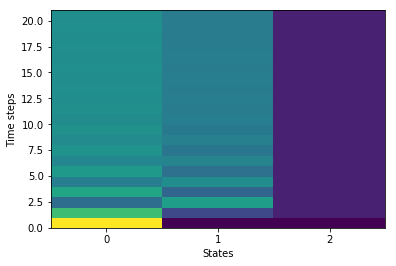

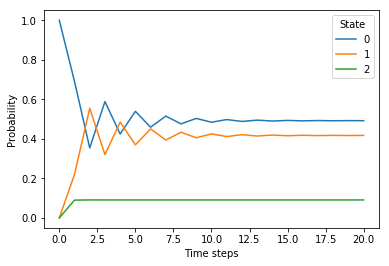

Text(0,0.5,'Probability')

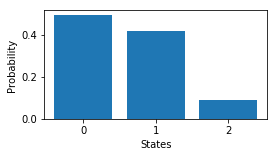

In [28]:
P = np.array([[0.2, 0.7, 0.1],
              [0.9, 0.0, 0.1],
              [0.2, 0.8, 0.0]])
init_state=np.array([1.0, 0.0, 0.0])
n = 20

prob_model = get_prob_model(P, init_state, n)

#plot the probabilities in the n-th step of being in each state
state_num = [i for i in range(len(init_state))]
fig, axes = plt.subplots(figsize=(4,2))
plt.xticks(np.arange(0, len(init_state), 1))
plt.bar(state_num, height=prob_model)
plt.xlabel("States")
plt.ylabel("Probability")


### Reachability (absorption probability) and hitting times.
Write a function that takes as input:
- a DTMC (the transition matrix `transition_model` is enough),
- a subset of states `target_region` (either specified by their name or by their indices).
The function should compute a vector `prob_absorption_model`, containing the **absorption probability** for each state. Use the iterative method discussed in the lecture. 

Implement also a method with the same input, returning the **expected hitting times** `exp_hitting_time_model`.

In [29]:
#the function takes in input the transition matrix 
#and a vector whose values are the indices of the states of the region
#and returns the absorption probability for each state and the number of steps executed

def get_prob_absorption_model(transition_model, target_region):
    
    maxcount = 100
    #STEP 1: modify DTMC to pi_A
    pi_A = transition_model
    for i in range(len(target_region)):
        index = target_region[i]
        for j in range(len(transition_model)):
            pi_A[index][j] = 0
        pi_A[index][index] = 1
        
    #STEP 2: compute h_0
    h_0 = [0 for i in range(len(transition_model))]
    for i in range(len(target_region)):
        h_0[target_region[i]]=1
        
    #STEP 3: compute h_n until the error is smaller than epsilon
    h_pre = h_0
    h_after = np.matmul(pi_A, h_0)
    eps = 0.01
    count = 0
    
    h_pre = h_after
    h_after = np.matmul(pi_A,h_after)
    count = count + 1  
    
    while(np.linalg.norm(h_after-h_pre)>eps and count != maxcount):
        h_pre = h_after
        h_after = np.matmul(pi_A,h_after)
        count = count + 1  
    
    if(count == maxcount):
        warnings.warn("The algorithm doesn't converge in " + str(maxcount) + " steps")
    return h_after, count



In [30]:
#the function takes in input the transition matrix 
#and a vector whose values are the indices of the states of the region
#and returns the hitting time for each state and the number of steps executed
def get_exp_hitting_time_model(transition_model, target_region):
    
    e_0 = [1 for i in range(len(transition_model))]
    maxcount = 100
    
    #STEP 1: modify DTMC to pi_A
    pi_A = transition_model
    for i in range(len(target_region)):
        index = target_region[i]
        for j in range(len(transition_model)):
            pi_A[index][j] = 0
        pi_A[index][index] = 1
        
    #STEP 2: compute xi_0
    xi_0 = [1 for i in range(len(transition_model))]   
    for i in range(len(target_region)):
        xi_0[target_region[i]]=0
        
    #STEP 3: compute xi_n until the error is smaller than epsilon
    xi_pre = xi_0
    xi_pre= [a + b if a>0 else 0 for a, b in zip(xi_pre, e_0) ] 
    xi_after = np.matmul(pi_A, (xi_pre))
    eps = 0.01
    count = 0
    
    xi_pre = xi_after
    xi_after= [a + b if a>0 else 0 for a, b in zip(xi_after, e_0) ]
    xi_after = np.matmul(pi_A,(xi_after))
    count = count + 1  
    
    while(np.linalg.norm(xi_after-xi_pre)>eps and count != maxcount):
        xi_pre = xi_after
        xi_after= [a + b if a>0 else 0 for a, b in zip(xi_after, e_0) ]
        xi_after = np.matmul(pi_A,(xi_after))
        count = count + 1
        
    if(count == maxcount):
        warnings.warn("The algorithm doesn't converge in " + str(maxcount) + " steps")   
        
    return xi_after, count

In [31]:
#This example is taken from the gambler's ruin of the slides
P = np.array([[1, 0, 0, 0, 0],
              [0.6, 0, 0.4, 0, 0],
              [0, 0.6, 0, 0.4, 0],
              [0, 0, 0.6, 0, 0.4],
              [0, 0, 0, 0, 1]])
region=np.array([0])
h_n, n = get_prob_absorption_model(P, region)
xi_m, m = get_exp_hitting_time_model(P, region)

print("The absortion probability (at the " + str(n) + "-th time step) is the following: ")
print(h_n)

print("The expected hitting time (at the " + str(m) + "-th time step) is the following: ")
print(xi_m)

The absortion probability (at the 11-th time step) is the following: 
[1.         0.86986697 0.68384036 0.40480045 0.        ]
The expected hitting time (at the 100-th time step) is the following: 
[  0.          13.61893491  33.35502959  61.22840237 102.        ]


/home/romina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: UserWarning: The algorithm doesn't converge in 100 steps


### Steady state probability

Write a function taking as input a DTMC and computes its steady state probability, assuming the chain is irreducible, aperiodic, and finite. 
*Extra*: explore Python libraries and find one implementing graph algorithms. Use a method to compute strongly connected components to check if a chain is irreducible. 

If a chain is not irreducible, feel free to make it reducible adding transitions where needed.

In [32]:
#the function takes in input the transition matrix and returns the steady state probability and the mixing time

def get_steady_state_probability(transition_model):
    
    #define an inital state (the steady state behaviour doesn't depend on it)
    p_0 = [0 for i in range(len(transition_model))]
    p_0[0]=1
        
    #compute p_n until the error is smaller than epsilon = 0.01
    p_pre = p_0
    p_after = np.matmul(p_0,transition_model)
    eps = 0.0001
    count = 0
    
    while(np.linalg.norm(p_after-p_pre)>eps and count != 100):
        p_pre = p_after
        p_after = np.matmul(p_after,transition_model)
        count = count + 1  
          
    return p_after, count


In [33]:
#This example is taken from the flue model on the slides
P = np.array([[0.8, 0.2, 0],
              [0.0, 0.6, 0.4],
              [0.01, 0.0, 0.99]])
region=np.array([0])
h_n, n = get_steady_state_probability(P)

print("The absortion probability at the " + str(n) + "-th time step is the following: ")
print(h_n)

The absortion probability at the 35-th time step is the following: 
[0.0466374  0.02339647 0.92996613]


#### Model class

Implement a class having all the methods to initialize a DTMC, to compute transient behaviour, steady state behaviour, and reachability. Consider also defining a map linking state numbers to reference meaningful names.

In [34]:
class DTCM:
    """A class to initialize a DTMC, to compute transient behaviour, steady state behaviour, and reachability"""
    
    def __init__(self, trans_matrix, init_prob):
        self.check_well_defined(trans_matrix)
        self.trans_matrix = trans_matrix
        self.init_prob = init_prob
        self.state_names = None

    def check_well_defined(self, trans_matrix):
        epsilon = 0.0001
        for i in range(len(trans_matrix)):
            sum_row = 0
            for j in range(len(trans_matrix)):
                sum_row = sum_row + trans_matrix[i][j]
            if(sum_row > (1.0 + epsilon) or sum_row < (1 - epsilon)):
                raise Exception("The transition matrix is not well defined!")
        
        
    #Transient behviour
    def get_prob_model(self, n, create_plot = True):
        pi=[]
        pi.append(self.init_prob)
        trans_copy=self.trans_matrix.copy()
        for i in range(n):
            trans_copy=np.matmul(trans_copy,self.trans_matrix)
            prob_model = np.matmul(self.init_prob,trans_copy)
            pi.append(prob_model)
        if(create_plot):
            print(prob_model)
            dfdistribution = pd.DataFrame(pi)
            plt.pcolormesh(dfdistribution)
            plt.show()
            dfdistribution.plot()
            plt.show()
        return prob_model

    #steady state behaviour
    def get_steady_state_probability(self):    
        #define an inital state (the steady state behaviour doesn't depend on it)
        p_0 = [0 for i in range(len(self.trans_matrix))]
        p_0[0]=1        
        #compute p_n until the error is smaller than epsilon = 0.01
        p_pre = p_0
        p_after = np.matmul(p_0,self.trans_matrix)
        eps = 0.0001
        count = 0    
        while(np.linalg.norm(p_after-p_pre)>eps and count != 100):
            p_pre = p_after
            p_after = np.matmul(p_after,self.trans_matrix)
            count = count + 1            
        return p_after, count

    #reachability
    def get_prob_absorption_model(self, target_region):
        #STEP 1: modify DTMC to pi_A
        pi_A = self.trans_matrix
        for i in range(len(target_region)):
            index = target_region[i]
            for j in range(len(self.trans_matrix)):
                pi_A[index][j] = 0
            pi_A[index][index] = 1
        #STEP 2: compute h_0
        h_0 = [0 for i in range(len(self.trans_matrix))]
        for i in range(len(target_region)):
            h_0[target_region[i]]=1
        #STEP 3: compute h_n until the error is smaller than epsilon = 0.01
        h_pre = h_0
        h_after = np.matmul(pi_A, h_0)
        eps = 0.01
        count = 0
        h_pre = h_after
        h_after = np.matmul(pi_A,h_after)
        count = count + 1  
        while(np.linalg.norm(h_after-h_pre)>eps and count != 100):
            h_pre = h_after
            h_after = np.matmul(pi_A,h_after)
            count = count + 1            
        return h_after, count
    
    #hitting time
    def get_exp_hitting_time_model(self, target_region):    
        e_0 = [1 for i in range(len(self.trans_matrix))]
        maxcount = 100
        #STEP 1: modify DTMC to pi_A
        pi_A = self.trans_matrix
        for i in range(len(target_region)):
            index = target_region[i]
            for j in range(len(self.trans_matrix)):
                pi_A[index][j] = 0
            pi_A[index][index] = 1
        #STEP 2: compute xi_0
        xi_0 = [1 for i in range(len(self.trans_matrix))]   
        for i in range(len(target_region)):
            xi_0[target_region[i]]=0
        #STEP 3: compute xi_n until the error is smaller than epsilon
        xi_pre = xi_0
        xi_pre= [a + b if a>0 else 0 for a, b in zip(xi_pre, e_0) ] 
        xi_after = np.matmul(pi_A, (xi_pre))
        eps = 0.01
        count = 0
        xi_pre = xi_after
        xi_after= [a + b if a>0 else 0 for a, b in zip(xi_after, e_0) ]
        xi_after = np.matmul(pi_A,(xi_after))
        count = count + 1  
        while(np.linalg.norm(xi_after-xi_pre)>eps and count != maxcount):
            xi_pre = xi_after
            xi_after= [a + b if a>0 else 0 for a, b in zip(xi_after, e_0) ]
            xi_after = np.matmul(pi_A,(xi_after))
            count = count + 1
        if(count == maxcount):
            warnings.warn("The algorithm doesn't converge in " + str(maxcount) + " steps")   
        return xi_after, count
    
    #map linking state numbers to names
    def map_names(self, names):
        state_num = [i for i in range(len(self.trans_matrix))]
        self.state_names = dict(zip(state_num, names))


In [35]:
#test the class with an example
P = np.array([[0.2, 0.7, 0.1],
              [0.9, 0.0, 0.1],
              [0.2, 0.8, 0.0]])
init_state=np.array([1.0, 0.0, 0.0])
n = 20

dtcm = DTCM(P, init_state)
dtcm.get_prob_model(n, False)
dtcm.get_steady_state_probability()
dtcm.get_prob_absorption_model([0])
dtcm.map_names(["Pippo", "state_2", "state_3"])
dtcm.state_names

{0: 'Pippo', 1: 'state_2', 2: 'state_3'}

### Summary exercise
#### Small Monopoly: 

The game Small Monopoly is played on a
game board that has 16 spaces arranged around the outside of a square. The squares
have names like Reading Railroad and Park Place but we will number the squares
0 (Go), 1 (Baltic Avenue), ..., 15 (Boardwalk). You roll two dice
and move forward a number of spaces equal to the sum. The game ends when you reach or pass Boardwalk.

- Square 12 is “Go to Jail,” which sends you to square 4. If you roll a double, you get out.
- There are two Chance squares at 2 and 10 (diamonds on the graph) where you
draw a card, which can send you to another square. The card is picked (with replacement) from a deck containing all the 16 squares.

- Described this game as a directed graph, i.e. define its transition matrix.
- What is the probability of ending the game?
- How long does a game take on average?

<img src="imgs/monopoly.png" width="300">

We can consider that rolling 2 dices allows the following movements with the respective probabilities (approximated):
<img src="imgs/table.png" width="200">

From this probabilities, we can build the transition matrix, also considering the other rules of the game. The following assumptions are made:
* If you are in the jail and you roll a double, you go out to the square corresponding to the sum of your dices
* When you pick a card (chances), you have the probability of 0.0625 of arriving to any square 
* If performing the number of steps defined by the dices you go over 15, then it means that you won. So, the probability of reaching the 15-th square sums to the probability of passing it.



In [36]:
#Build the transition matrix and initial state
pi = [[0, 0, 0.03, 0.06, 0.08, 0.11, 0.14, 0.16, 0.14, 0.11, 0.08, 0.06, 0.03, 0, 0, 0],
     [0, 0, 0, 0.03, 0.06, 0.08, 0.11, 0.14, 0.16, 0.14, 0.11, 0.08, 0.06, 0.03, 0, 0],
     [0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625],
     [0, 0, 0, 0, 0, 0.03, 0.06, 0.08, 0.11, 0.14, 0.16, 0.14, 0.11, 0.08, 0.06, 0.03],
     [0, 0, 0, 0, 1-(0.03*6), 0, 0.03, 0, 0.03, 0, 0.03, 0, 0.03, 0, 0.03, 0.03],
     [0, 0, 0, 0, 0, 0, 0, 0.03, 0.06, 0.08, 0.11, 0.14, 0.16, 0.14, 0.11, 0.08+0.06+0.03],
     [0, 0, 0, 0, 0, 0, 0, 0, 0.03, 0.06, 0.08, 0.11, 0.14, 0.16, 0.14, 0.11+0.08+0.06+0.03],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.03, 0.06, 0.08, 0.11, 0.14, 0.16, 0.14+0.11+0.08+0.06+0.03],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.03, 0.06, 0.08, 0.11, 0.14, 0.16+0.14+0.11+0.08+0.06+0.03],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.03, 0.06, 0.08, 0.11, 0.14+0.16+0.14+0.11+0.08+0.06+0.03],
     [0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.03, 0.06, 0.08+0.11+0.14+0.16+0.14+0.11+0.08+0.06+0.03],
     [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]]

init_state = [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

#Initialize the DTCM
dtcm = DTCM(pi, init_state)
dtcm.map_names(["Go", "Baltic Avenue", "Reading Railroad", "Park Place" , "Jail", "Galactic Square", "Romantic Street" , "China Town", "Shopping Center", "Tatooine", "Blue Lake" , "Paradise Beach" ,"Gangster Town" , "Luna Park" , "Castle Black" ,"Boardwalk"])

#Compute the probability of ending the game and the expected hitting time
p_end, n = dtcm.get_prob_absorption_model([15])
t_end, m = dtcm.get_exp_hitting_time_model([15])

print("The probability of ending the game (with average time: " + str(t_end[0]) + " ) is the following: ")
print(p_end[0])

The probability of ending the game (with average time: 3.220094604408118 ) is the following: 
0.9885104926584927
